In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\Dataset\train_titanic_dataset.csv")

In [4]:
# family joh hai voh siblingspouse aur parent child mil ke bna hai
df['Family'] = pd.concat([df['SibSp']+df['Parch']],axis=1)

In [5]:
df = df[['Age','Fare','Family','Survived']]
# we are only taking the these 4 columns to used as we know age having miising values

In [6]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [7]:
df.isnull().sum()

Age         177
Fare          0
Family        0
Survived      0
dtype: int64

In [ ]:
df = x_train['Age'].fillna(99)

In [8]:
x = df.drop(columns = ['Survived'])
y = df['Survived']

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2,test_size = 0.2 )

In [10]:
x_train['age_99'] = x_train['Age'].fillna(99)
x_train['age-1']  = x_train['Age'].fillna(-1)

# Variance

In [12]:
print('Original age variable variance',x_train['Age'].var())
print('age variance after median imputation',x_train['age_99'].var())
print('age variance after mean imputation',x_train['age-1'].var())

Original age variable variance 204.3495133904614
age variance after median imputation 951.7275570187172
age variance after mean imputation 318.0896202624484


# pdf

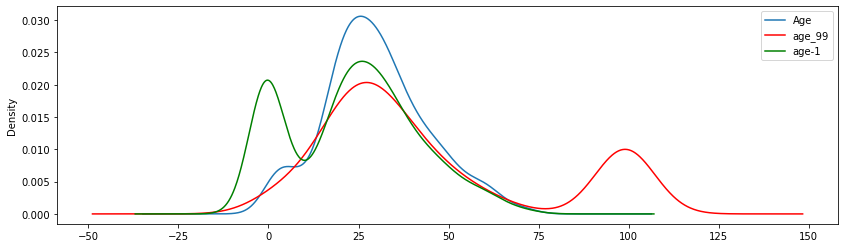

In [15]:
fig = plt.figure(figsize=(14,4))
ax = fig.add_subplot(111)

# original distribution
x_train['Age'].plot(kind = 'kde',ax=ax)

# with meadian
x_train['age_99'] .plot(kind= 'kde',ax=ax,color = 'red')
# with mean
x_train['age-1'].plot(kind='kde',ax=ax,color = 'green')

# add legends
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


In [16]:
x_train.corr()

,Age,Fare,Family,age_99,age-1
Age,1.000000,0.095814,-0.299113,1.000000,1.000000
Fare,0.095814,1.000000,0.209323,-0.067310,0.146049
Family,-0.299113,0.209323,1.000000,-0.144787,-0.140668
age_99,1.000000,-0.067310,-0.144787,1.000000,-0.344476
age-1,1.000000,0.146049,-0.140668,-0.344476,1.000000


In [17]:
x_train.cov()

,Age,Fare,Family,age_99,age-1
Age,204.349513,71.512440,-6.498901,204.349513,204.349513
Fare,71.512440,2368.246832,16.847264,-101.053412,126.761454
Family,-6.498901,16.847264,2.735252,-7.387287,-4.149246
age_99,204.349513,-101.053412,-7.387287,951.727557,-189.535540
age-1,204.349513,126.761454,-4.149246,-189.535540,318.089620


# Sklearn using  

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2,test_size = 0.2 )


In [19]:
imputer1 = SimpleImputer(strategy = 'constant',fill_value =99)
imputer2 = SimpleImputer(strategy = 'constant',fill_value = 999)

# for mean

In [20]:
trf = ColumnTransformer([
    ('impute1',imputer1,['Age'])
],remainder = 'passthrough')

In [21]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('impute1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age'])])

In [22]:
trf.named_transformers_['impute1'].statistics_

array([99.])

# median

In [23]:
trf2 = ColumnTransformer([
    ('impute2',imputer2,['Age'])
],remainder = 'passthrough')

In [24]:
trf2.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('impute2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Age'])])

In [25]:
trf2.named_transformers_['impute2'].statistics_

array([999.])